# EXAFS processing

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from fluorescence_yield_processor import *


# load data

In [2]:
detector = 'ge_8element'
num_elements = 8

test = load_h5_data('data/nopi_2025-06_noesaf/202506041014-Ti_XAFS_scan_testing-xafs_scan-3f8be6a8.hdf',
                    detector=detector,
                    num_elements=num_elements,
                    )

# align MCA spectra

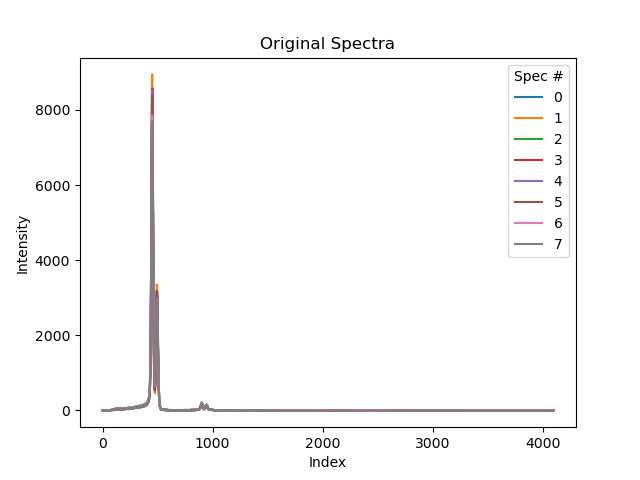

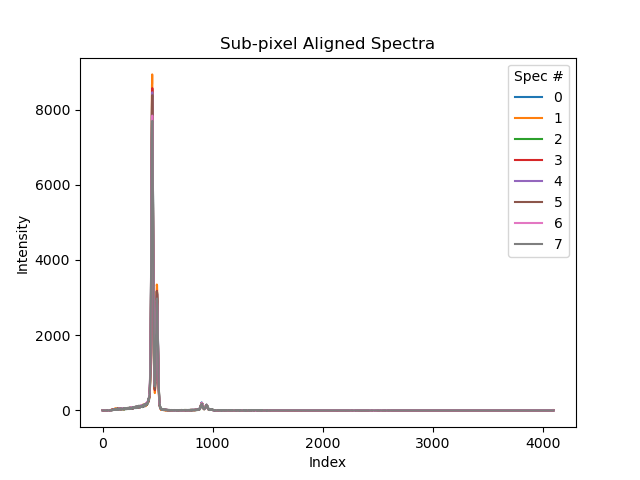

shifts = [0.8726152235543919, -0.046405250324212007, 0.09269648045717557, -0.34532923057432563, -0.6055246928726334, -0.19439241106591415, -0.12782805363934155, -8.360387997589566e-15]


In [3]:
# choose the last energy point
energy_point_index = -1

shifts = align_spec(test['data'][detector][energy_point_index], 
                    align_to_idx=-1, # channel to align
                    plot=True)

print(f'shifts =', shifts)

# generate dead-time, MCA aligned fluorescence-yield XAS

### plot

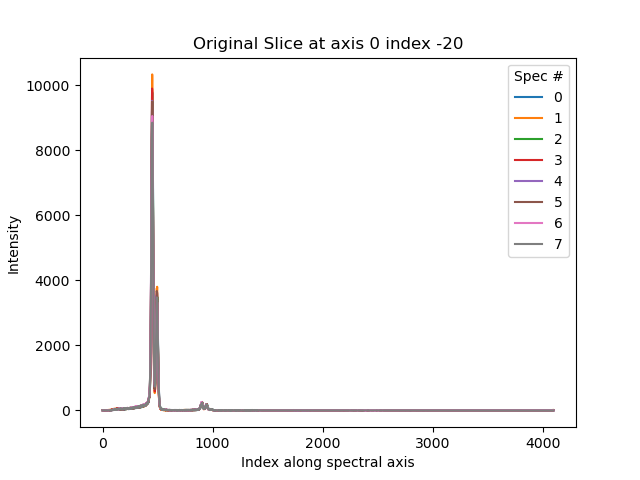

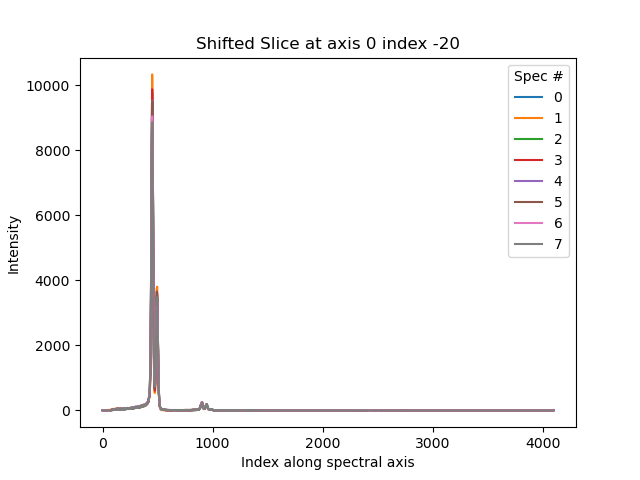

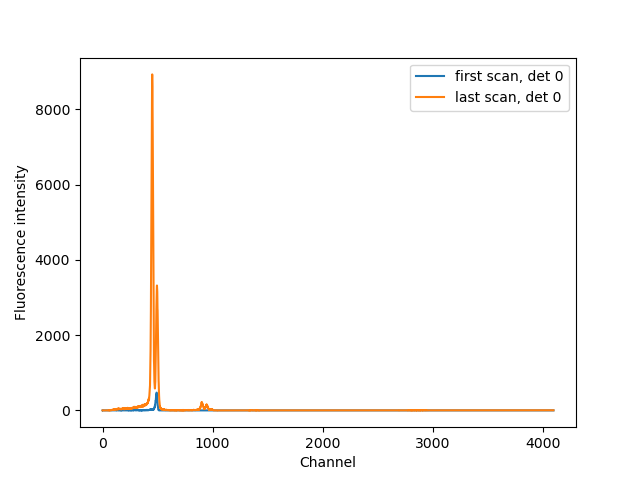

Exported results to Ti_testTi XAFS_scan testing_20250604_1014_3f8be6a8-bfdd-427a-bb68-e5af3213ec3f.csv


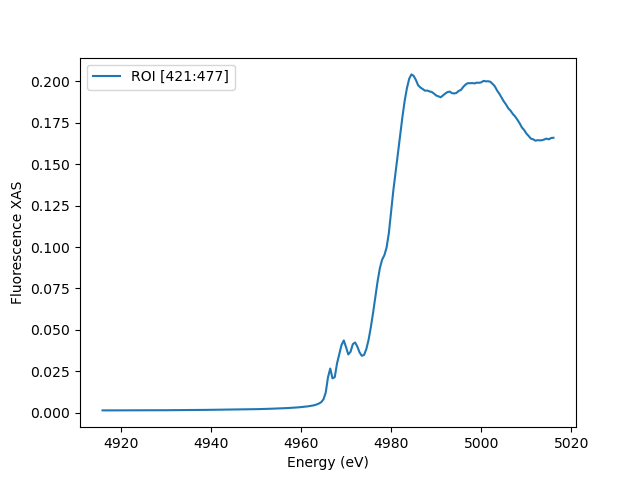

In [4]:
roi = [421, 477]
xas = fluorescence_XAS_generate(hdf=test,
                                I0=test['ion_chamber']['Ipreslit-mcs-scaler-channels-1-net_count'],
                                roi=roi, 
                                align_shifts=shifts, # comment this line to skip shifting 
                                plot_fluo=1, # plot MCA fluorescence of first and last scan
                                plot_xas=True,
                                plot_shifts_index = -20,
                                export=True,
                                export_prefix='Ti_test',
                                norm=False)

# Normalize spectrum

In [5]:
xas1_norm = normalize_fluorescence_xas(test['data']['monochromator-energy'], 
                                        xas,
                                        e0= 4970,
                                        pre_range=(-50, -30),
                                        post_range=(50, 150),
                                        plot=True)
    

ValueError: Not enough points in pre- or post-edge region for fitting.

# plot individual MCA spectra  for different energies

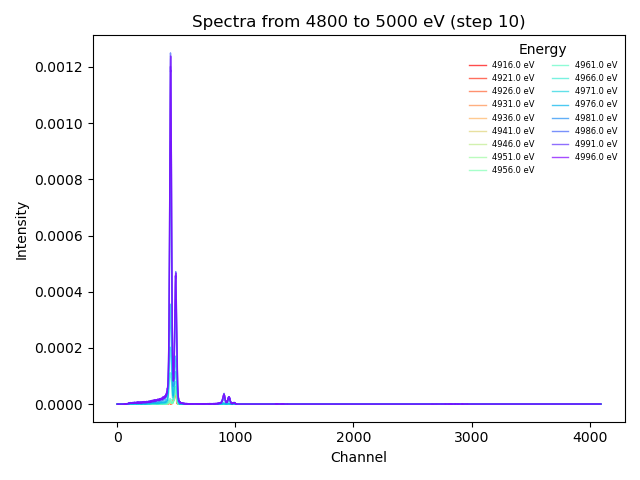

In [6]:
inds = plot_spectra_energy_range(
    energies=test['data']['monochromator-energy'],
    fluorescence=test['data'][detector],
    I0=test['ion_chamber']['IpreKB-mcs-scaler-channels-2-net_count'],
    energy_min=4800,
    energy_max=5000,
    energy_steps=10,
    channel=0
)

# batch processing from a folder

Exported results to LNMO_Zr/exported/sam0315-2_3YZr_Zr_20250410_0028_24c2cd18-427b-4c98-a0cb-254a30e1998c.csv


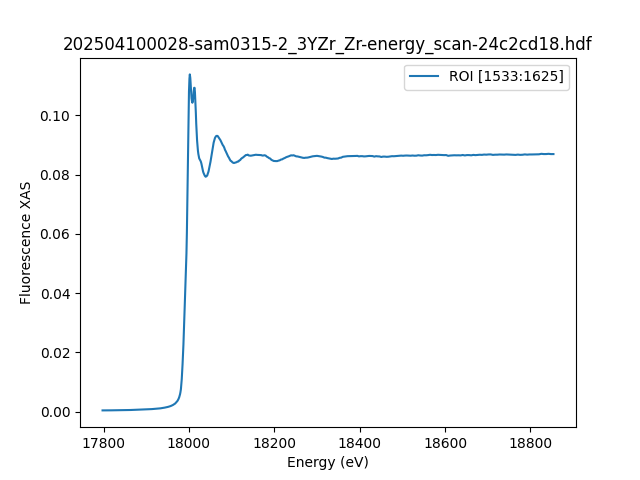

Exported results to LNMO_Zr/exported/sam0315-2_3YZr_Zr_20250410_0044_abf4a9cf-8817-47e1-90e4-a2e7b29947d6.csv


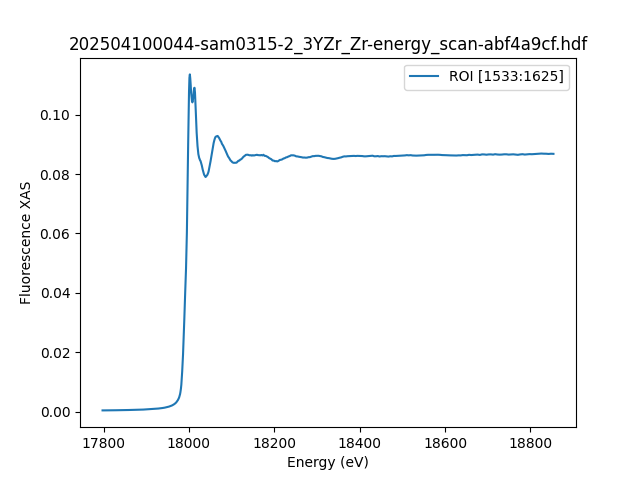

Exported results to LNMO_Zr/exported/sam0315-2_3Zr_Zr_20250410_0104_f3f39bf1-8714-4359-8fb0-9294d70a49d3.csv


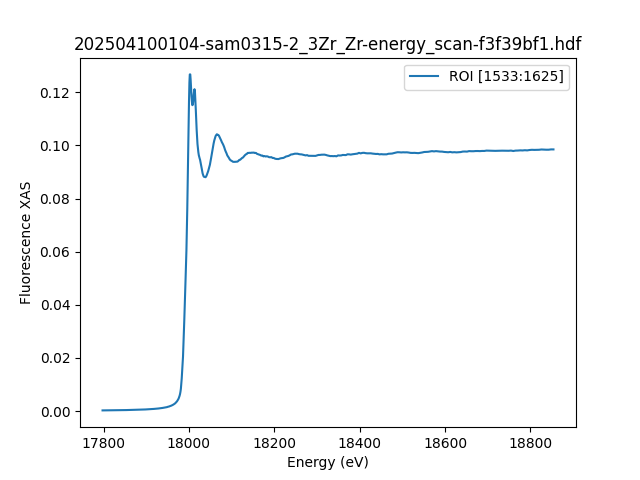

Exported results to LNMO_Zr/exported/sam0315-2_3Zr_Zr_20250410_0120_11c5bc25-82a2-4a47-ae86-3bfd15502e09.csv


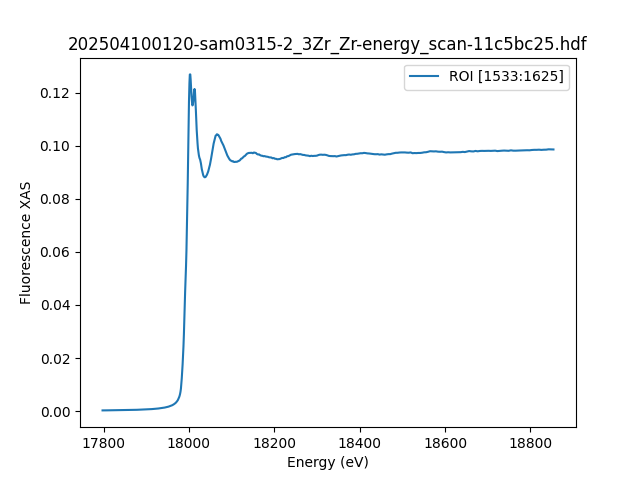

Exported results to LNMO_Zr/exported/Z_cycled_Zr_20250410_0153_7838b998-11b4-4fac-ab15-c28d0f73f6ea.csv


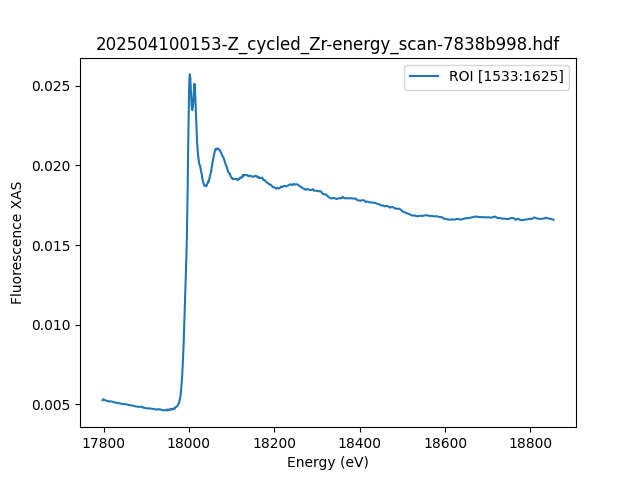

Exported results to LNMO_Zr/exported/Z_cycled_Zr_20250410_0209_03bf38a7-9090-4313-bd7c-8117c156a1a2.csv


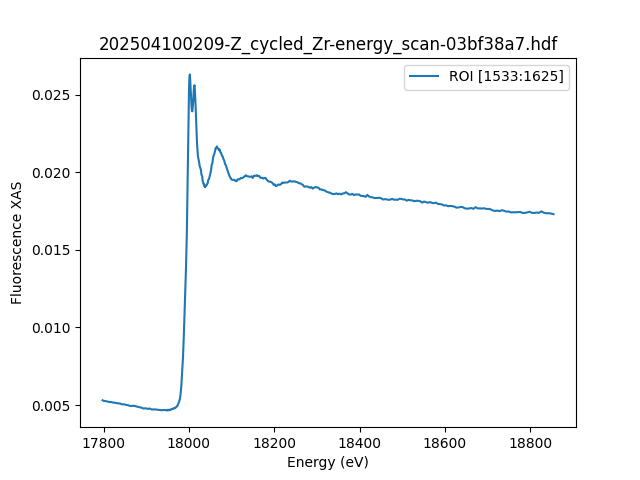

Exported results to LNMO_Zr/exported/YZ_cycled_Zr_20250410_0225_098e92b2-6caa-46c8-bdfa-971712d99104.csv


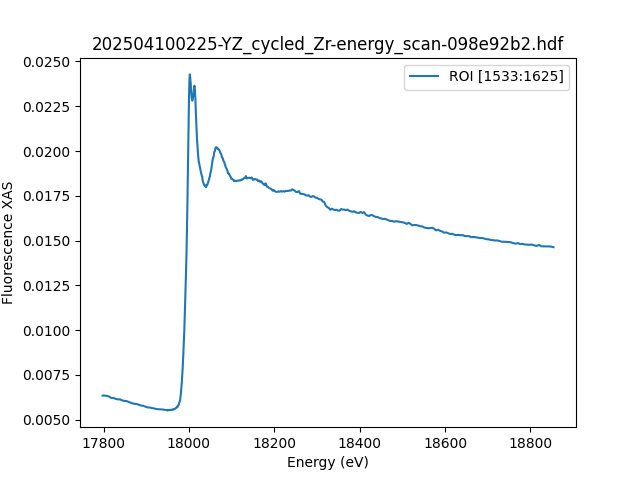

Exported results to LNMO_Zr/exported/YZ_cycled_Zr_20250410_0240_f3ff9b99-6897-48fe-b094-a4b3572151fe.csv


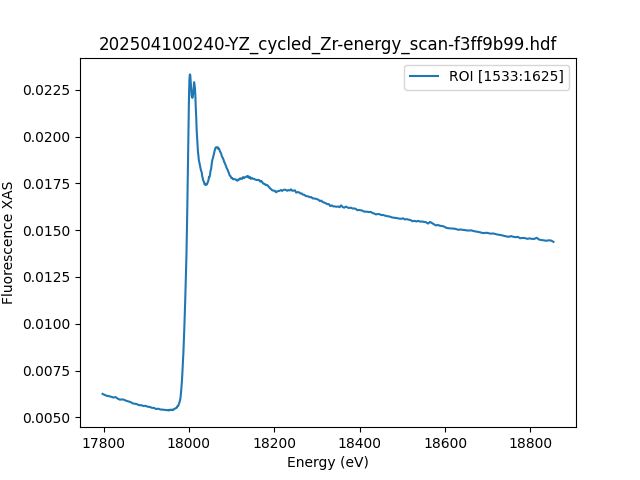

Exported results to LNMO_Zr/exported/YZ_cycled_Zr_20250410_0256_b54d427b-1b89-40e8-a0eb-14e1e412ac17.csv


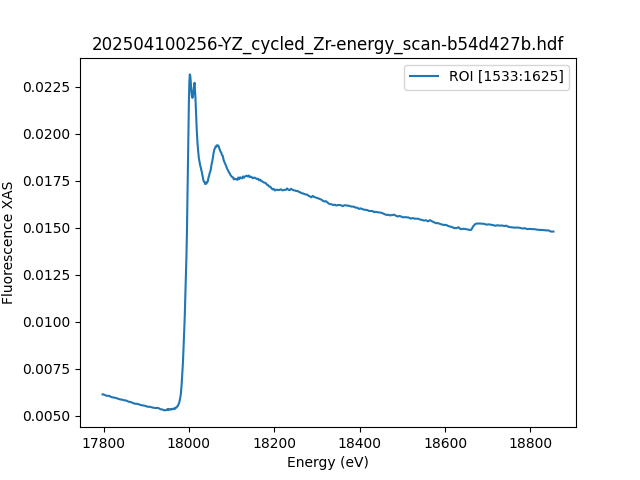

Exported results to LNMO_Zr/exported/sam0305_3Zr_20250410_0729_ff6593ba-e7b5-4acc-9632-58967275233a.csv


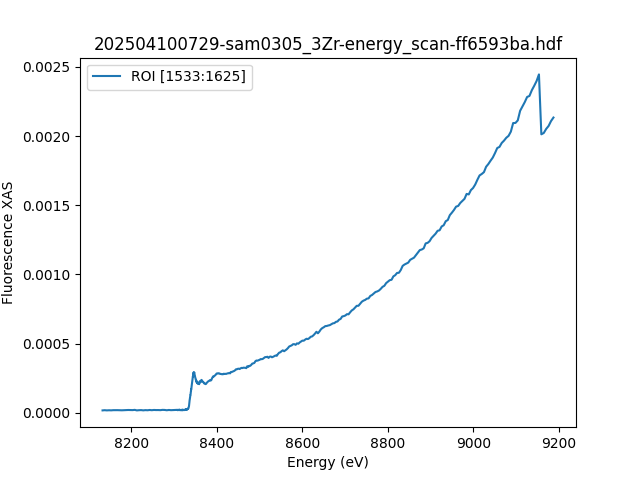

Exported results to LNMO_Zr/exported/sam0305_3Zr_20250410_0749_ccff1b9a-c558-42ff-9275-c94f4eb5e1e4.csv


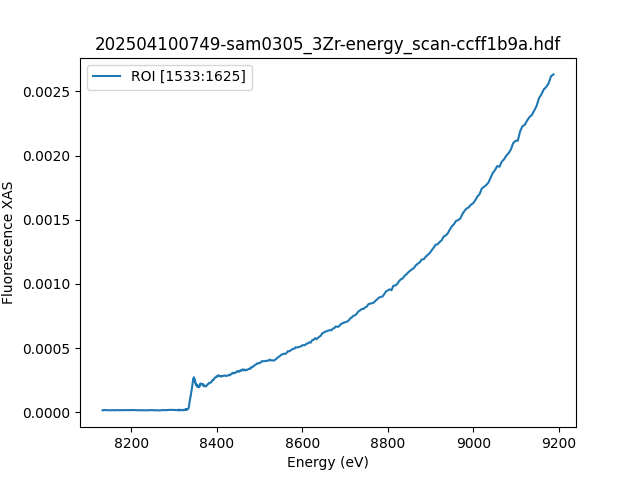

In [8]:
import glob
files = glob.glob('LNMO_Zr/*energy_scan*.hdf')
files.sort()
detector = 'ge_8element'
num_elements = 8
roi = [1533, 1625]
shifts = [3.431835534302314, 0.0, 0.9658175764194116, -1.3026883714893338, -2.384257878250015, -0.629383780842968, 0.9059819718617264, 0.5250963845225958]

for file_i in files:
    try:
        spec = load_h5_data(file_i,
                            detector=detector,
                            num_elements=num_elements,
                            )
        xas = fluorescence_XAS_generate(hdf=spec,
                                I0=spec['ion_chamber']['Ipreslit-mcs-scaler-channels-1-net_count'],
                                roi=roi, 
                                align_shifts=shifts, # comment this line to skip shifting 
                                plot_fluo=False, # plot MCA fluorescence of first and last scan
                                plot_xas=True,
                                export=True,
                                export_prefix='LNMO_Zr/exported/',
                                norm=False)
        
        plt.title(file_i.split('/')[-1])
        plt.show()
    except Exception as e:
        print(f"Error processing {file_i}: {e}")
        continue

# normalize spectrum

NameError: name 'test' is not defined